# **PIZZA SALES ANALYSIS REPORT**
## *PRESENTED BY OKUSANYA A. SIMILOLUWA*

# **Table of Contents**
- [Introduction](#introduction)
- [Pizza Place Sales Data](#pizza-place-sales-data)
- [Recommended Analysis](#recommended-analysis)
    - [Total Revenue](#1-total-revenue)
    - [Total Quantity Sold](#2-total-quantity-sold)
    - [Total Number of Orders](#3-total-number-of-orders)
    - [Unique Pizza Types Sold](#4-unique-pizza-types-sold)
    - [Average Pizza Price](#5-average-pizza-price)
    - [Peak Sales Hours](#6-peak-sales-hours)
    - [Sales by Day of the Week](#7-sales-by-day-of-the-week)
    - [Top 5 Bestselling Pizzas](#8-top-5-bestselling-pizzas)
    - [Monthly Sales Trend](#9-monthly-sales-trend)
    - [Poor Performing Pizzas](#10-poor-performing-pizzas)

# **Introduction**
The zip file for the task named “Pizza+Place+Sales.zip” was uploaded on the techcrush drive. It contains four CSV files: Orders, Order Details, Pizzas, and Pizza Types. There is also a data dictionary that describes each dataset.

In [3]:
import pandas as pd

In [ ]:
# Load datasets
orders = pd.read_csv("data/orders.csv")
order_details = pd.read_csv("data/order_details.csv")
pizzas = pd.read_csv("data/pizzas.csv")
pizza_types = pd.read_csv("data/pizza_types.csv", encoding= "ISO-8859-1" )

# Display previews
orders.head(), order_details.head(), pizzas.head(), pizza_types.head()

(   order_id        date      time
 0         1  2015-01-01  11:38:36
 1         2  2015-01-01  11:57:40
 2         3  2015-01-01  12:12:28
 3         4  2015-01-01  12:16:31
 4         5  2015-01-01  12:21:30,
    order_details_id  order_id       pizza_id  quantity
 0                 1         1     hawaiian_m         1
 1                 2         2  classic_dlx_m         1
 2                 3         2  five_cheese_l         1
 3                 4         2    ital_supr_l         1
 4                 5         2     mexicana_m         1,
      pizza_id pizza_type_id size  price
 0   bbq_ckn_s       bbq_ckn    S  12.75
 1   bbq_ckn_m       bbq_ckn    M  16.75
 2   bbq_ckn_l       bbq_ckn    L  20.75
 3  cali_ckn_s      cali_ckn    S  12.75
 4  cali_ckn_m      cali_ckn    M  16.75,
   pizza_type_id                          name category  \
 0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
 1      cali_ckn  The California Chicken Pizza  Chicken   
 2   ckn_alfredo     The Chi

# **Pizza Place Sales Data**
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients. The four CSV files was merged into a single data frame before analysis was done.

In [5]:
# Merge order_details with pizzas
merged_df = order_details.merge(pizzas, on='pizza_id', how='left')

# Merge with orders to get datetime
merged_df = merged_df.merge(orders, on='order_id', how='left')

# Merge with pizza_types to get type/category
merged_df = merged_df.merge(pizza_types, on='pizza_type_id', how='left')

# Convert date and time
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['time'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S').dt.time
merged_df['hour'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S').dt.hour
merged_df['weekday'] = merged_df['date'].dt.day_name()
merged_df['month'] = merged_df['date'].dt.month_name()

# Calculate revenue per row
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

merged_df.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients,hour,weekday,month,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11,Thursday,January,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",11,Thursday,January,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",11,Thursday,January,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",11,Thursday,January,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",11,Thursday,January,16.00


# **Recommended Analysis**

## 1. TOTAL REVENUE

In [ ]:
# What is the total revenue/sales?
merged_df['revenue'].sum() # This line sums all the revenue generated per row in the dataset.

817860.05

### The total revenue generated over the year is approximately **$817,860**.

## 2. TOTAL QUANTITY SOLD

In [ ]:
# Find the total quantity sold
merged_df['quantity'].sum() # This line adds all quantities of pizza sold as shown in the dataset.

49574

### The total quantity sold is **49,574**.

## 3. TOTAL NUMBER OF ORDERS

In [ ]:
# 3.Find the total orders
orders['order_id'].nunique() # This line counts the total orders of pizza in the dataset.

21350

### The total number of orders is **21,350**.

## 4. UNIQUE PIZZA TYPES SOLD

In [ ]:
# How many pizza types do they sell?
pizza_types['pizza_type_id'].nunique() # This line counts the number of unique pizza types in the dataset.

32

### There are **32 unique pizza types** sold.

## 5. AVERAGE PIZZA PRICE

In [ ]:
# Find the average price of the pizzas
pizzas['price'].mean() # This line calculates the average price of all the pizzas offered in the menu

16.440625

### The average price of the pizzas is approximately **$16**.

## 6. PEAK SALES HOURS

Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Sales by Hour'}, xlabel='hour'>

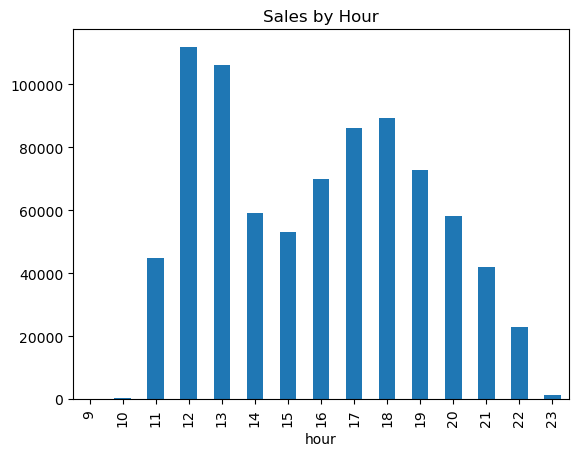

In [ ]:
# What are the peak hours of sales?

merged_df.groupby('hour')['revenue'].sum().plot(kind='bar', title="Sales by Hour") 

# This line calculates the total revenue made at specific hours of all the weekdays (by adding all the revenue generated each hour of the day), and visualizes data in chronological order in a bar chart.

### Peak Sales Hours
The bar chart above shows total revenue generated during each hour of the day. Sales peak the highest at **12PM**.


## 7. SALES BY DAY OF THE WEEK

<Axes: title={'center': 'Sales by Weekday'}, xlabel='weekday'>

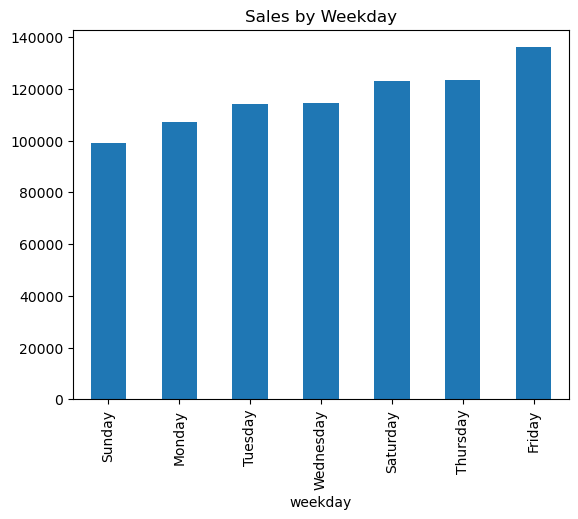

In [ ]:
# Find the total sales made on each day of the week. 
# Which day of the week is when sales are made the most?

merged_df.groupby('weekday')['revenue'].sum().sort_values().plot(kind='bar', title="Sales by Weekday")

# This line calculates the sales made per day (by adding all the revenue generated each weekday), sorts the info in ascending order, and visualizes data in a bar chart.

### Total Sales Made Per Day
The bar chart above shows the total sales made on each day of the week. Sales are made the most on **Fridays**.

## 8. TOP 5 BESTSELLING PIZZAS

In [ ]:
# Find the top 5 bestselling pizzas

merged_df.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).head(5)

# This line calculates the quantity of each pizza sold, sorts the info in descending order, and returns the first 5.

pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
Name: quantity, dtype: int64

### Top 5 Bestselling Pizzas

The top 5 bestselling pizzas by quantity sold are displayed above. These include **The Big Meat Pizza (small)**, **The Thai Chicken Pizza (large)**, **The Five Cheese Pizza (large)**, **The Four Cheese Pizza (large)**, and **The Classic Deluxe Pizza (medium)**.


## 9. MONTHLY SALES TREND

<Axes: title={'center': 'Monthly Sales'}, xlabel='month'>

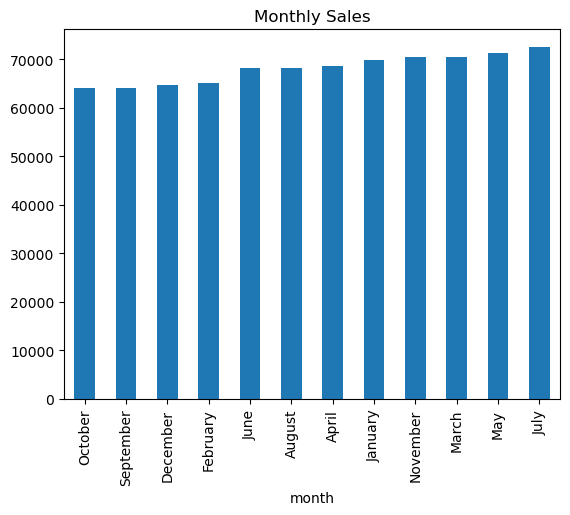

In [ ]:
# 9.Find the sales made in each month.

merged_df.groupby('month')['revenue'].sum().sort_values().plot(kind='bar', title="Monthly Sales")

# This line calculates the sales made per month (by adding all the revenue generated each month), sorts the info in ascending order, and visualizes data in a bar chart.

### Months with the Highest and Lowest Sales
**July** has the highest monthly sales, while **October** has the lowest monthly sales.

<Axes: title={'center': 'Monthly Sales'}, xlabel='month'>

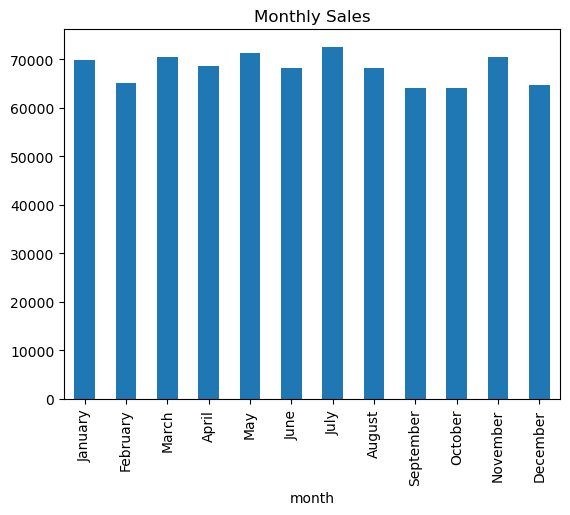

In [ ]:
# Any trend noticeable?

monthly_sales = merged_df.groupby('month')['revenue'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']) 
# This line calculates the sales made per month (by adding all the revenue generated each month), and arranges the info in chronological order (calendar order).

monthly_sales.plot(kind='bar', title="Monthly Sales") # This line visualizes the data in a bar chart.


### Monthly Sales Analysis

Sales were highest in **July**, possibly due to summer demand. There's a noticeable dip in **September and October**, suggesting slower business during that period. Despite these fluctuations, monthly sales remain relatively stable throughout the year. The increase in **November** may hint at early holiday season impact.

## 10. POOR PERFORMING PIZZAS

In [ ]:
# Are there pizza types that are not doing well on the menu?

merged_df.groupby('pizza_id')['quantity'].sum().sort_values().head(10)

# This line calculates the quantity of each pizza sold, sorts the info in ascending order, and returns the first 10.

pizza_id
the_greek_xxl      28
green_garden_l     95
ckn_alfredo_s      96
calabrese_s        99
mexicana_s        162
ckn_alfredo_l     188
ital_veggie_l     190
ital_supr_s       196
the_greek_l       255
spinach_supr_m    267
Name: quantity, dtype: int64

### Least Performing Pizzas

The 10 pizzas with the lowest sales volume are listed above. These include **The Greek Pizza (extra extra large)**, **The Green Garden Pizza (large)**, **The Chicken Alfredo Pizza (small)**, **The Calabrese Pizza (small)**, **The Mexicana Pizza (small)**, **The Chicken Alfredo Pizza (large)**, **The Italian Vegetables Pizza (large)**, **The Italian Supreme Pizza (small)**, **The Greek Pizza (large)**, and **The Spinach Supreme Pizza (medium)**.These underperforming items might be candidates for removal or reevaluation. Their poor sales could be due to factors like low customer demand, poor marketing, unusual ingredients, or limited availability in certain sizes.
